# Hello everyone!

**Team Members**

* Zeyad Abdelwahab
* Maryam Mohamed Afifi
* Mayada Magdy Amin
* Aly Osama Othman
* Omar Hegazy Hegazy
* Mohaned Gamal Hussin

**Project Overview**

This project focuses on Healthcare Predictive Analysis, leveraging data science techniques to analyze healthcare data and extract meaningful insights. The goal is to explore patterns, trends, and potential predictive capabilities within healthcare data.

**About the Dataset**

The dataset used in this project is a synthetic healthcare dataset, designed to resemble real-world medical data. It serves as a valuable resource for practicing data analysis, machine learning, and predictive modeling in a healthcare context.

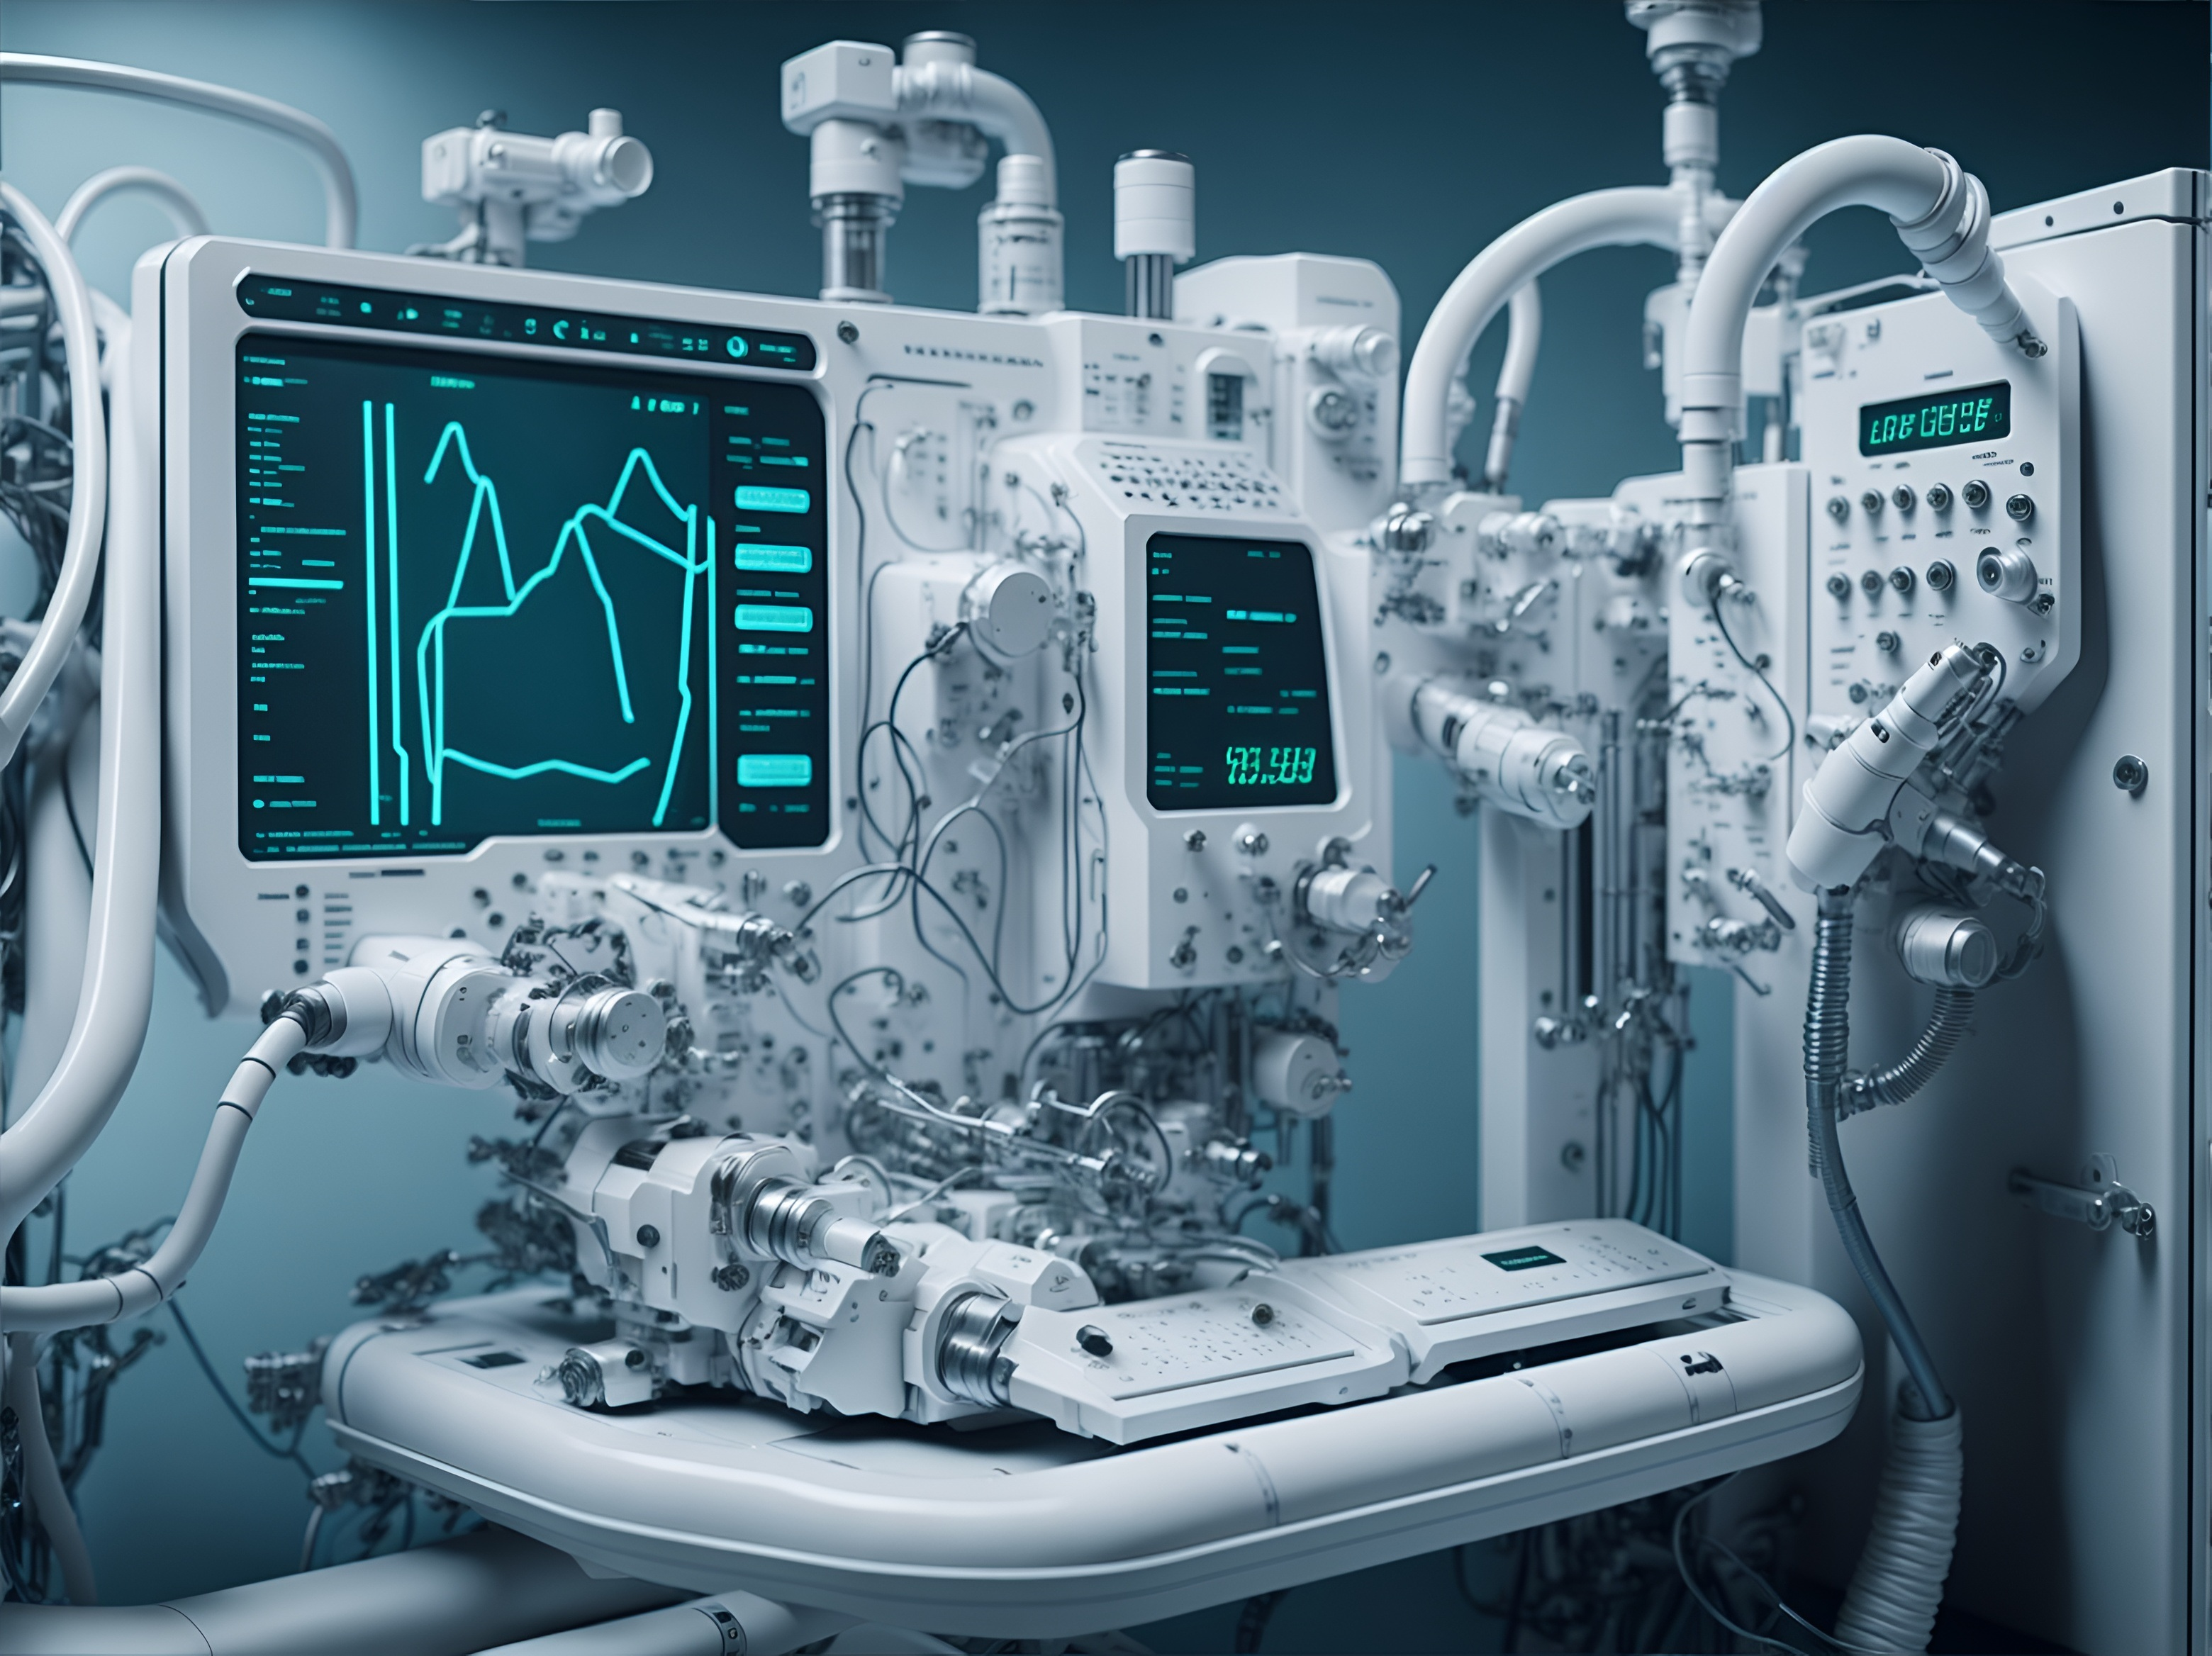

# 1. Import Libraries and Dataset

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [6]:
df = pd.read_csv(r"E:\DEPI Graduation project\healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# 2. Data Exeploration 

**2.1) EDA**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


**Identify Missing Values**

In [9]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

In [11]:
df.duplicated().sum()

np.int64(534)

Removing Duplicates

In [12]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print(f"Duplicates removed. Remaining rows: {len(df)}")

Duplicates removed. Remaining rows: 54966


**Convert Date Columns to DateTime Format**

In [13]:
date_columns = ['Date of Admission', 'Discharge Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

**2.2) Explore Categorical Features**

In [14]:
def check_unique_values(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for column in categorical_columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':\n{unique_values}\n")

check_unique_values(df)

Unique values in 'Name':
['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' ... 'LiSa sIMPsoN'
 'RoGER farRELl' 'kaTheRIne WeBSTer']

Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Blood Type':
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

Unique values in 'Medical Condition':
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

Unique values in 'Doctor':
['Matthew Smith' 'Samantha Davies' 'Tiffany Mitchell' ... 'Deborah Sutton'
 'Mary Bartlett' 'Alec May']

Unique values in 'Hospital':
['Sons and Miller' 'Kim Inc' 'Cook PLC' ... 'Guzman Jones and Graves,'
 'and Williams, Brown Mckenzie' 'Moreno Murphy, Griffith and']

Unique values in 'Insurance Provider':
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']

Unique values in 'Admission Type':
['Urgent' 'Emergency' 'Elective']

Unique values in 'Medication':
['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']

Unique values in 'Test Results':
['Normal' 'Inconclusive' 'Abnormal']



In [15]:
print(df['Gender'].value_counts())
print(df['Blood Type'].value_counts())
print(df['Medical Condition'].value_counts())
print(df['Admission Type'].value_counts())
print(df['Insurance Provider'].value_counts())
print(df['Test Results'].value_counts())

Gender
Male      27496
Female    27470
Name: count, dtype: int64
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64
Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64
Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64
Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64


**2.3) Explore Numerical Features**

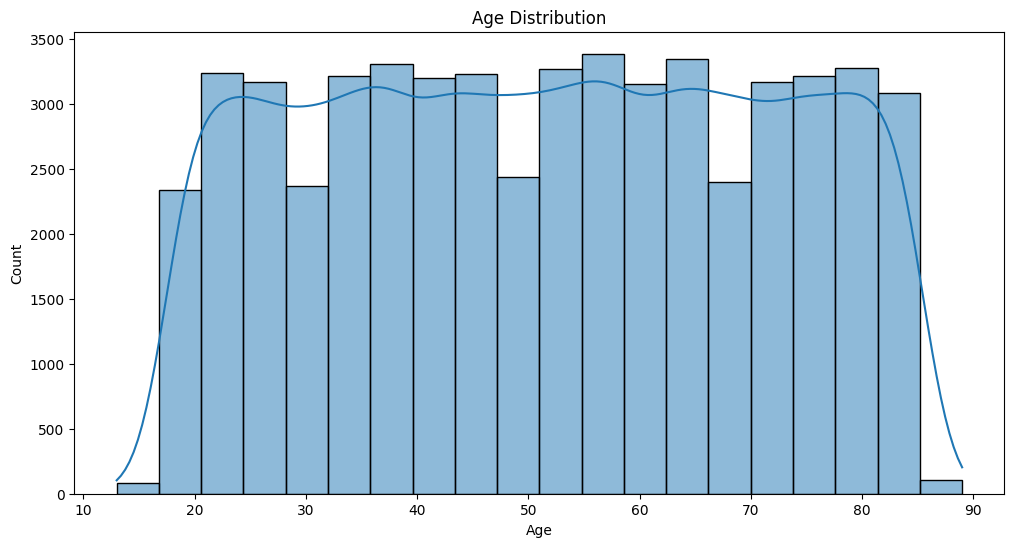

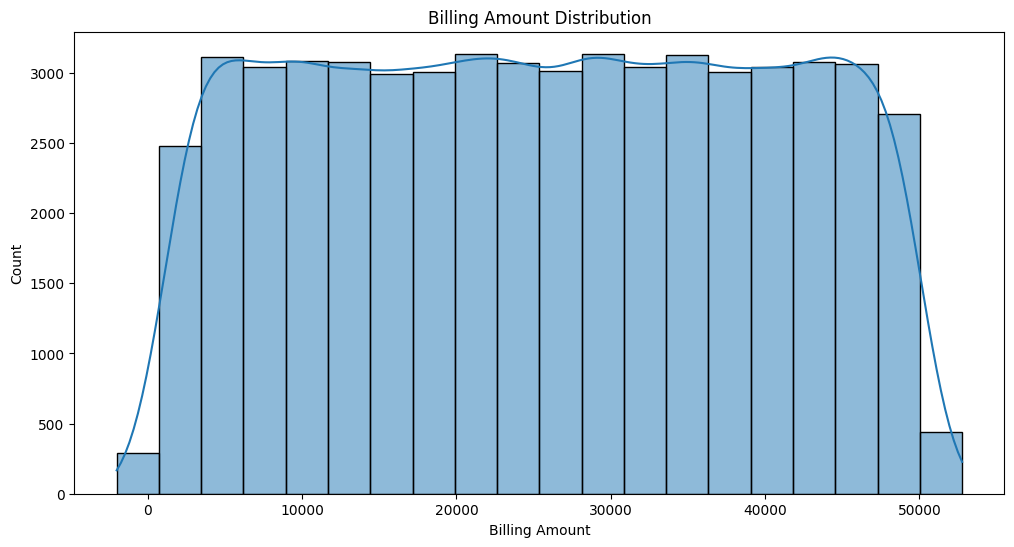

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Billing Amount'], bins=20, kde=True)
plt.title('Billing Amount Distribution')
plt.show()

**Detect Outliers**

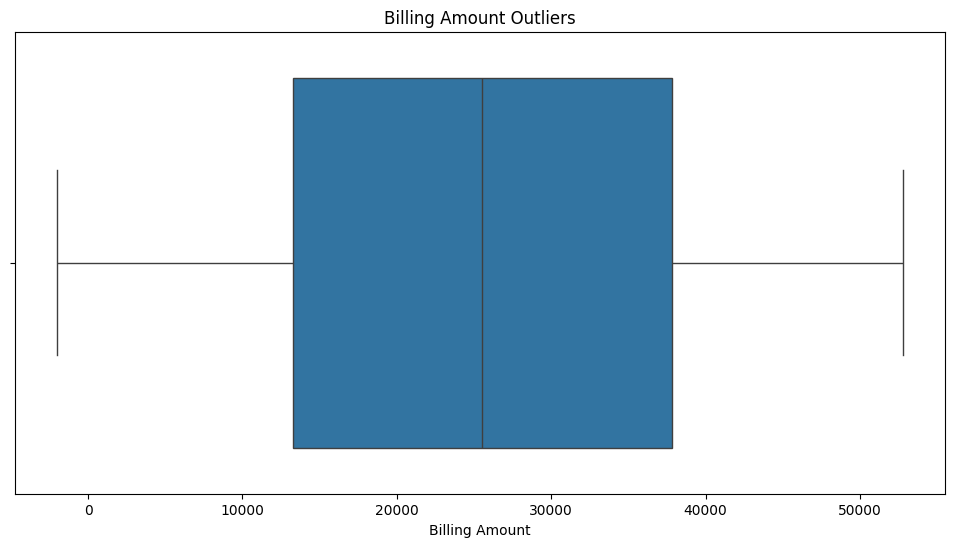

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Billing Amount'])
plt.title('Billing Amount Outliers')
plt.show()

**Identify Key Features**

Test Results Encoded    1.000000
Age                     0.007351
Billing Amount          0.005311
Room Number            -0.004161
Name: Test Results Encoded, dtype: float64


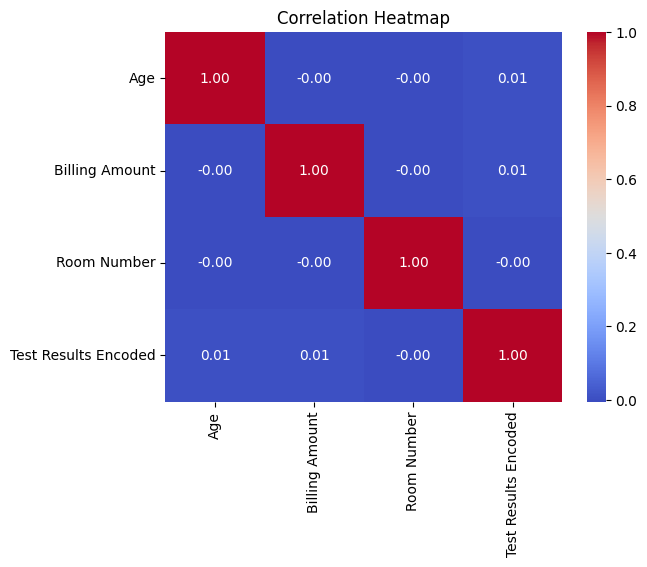

In [18]:
# Encode the target variable
df['Test Results Encoded'] = df['Test Results'].map({'Normal': 0, 'Abnormal': 1, 'Inconclusive': 2})

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])

##Adding the Encoded Target Variable to the Numeric DataFrame
numeric_df['Test Results Encoded'] = df['Test Results Encoded']

# Calculate correlations
corr = numeric_df.corr()

# Display correlations with the target variable
print(corr['Test Results Encoded'].sort_values(ascending=False))

# Visualize correlations
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 3. Data Preprocessing

**3.1) Handle Missing Data**

In [19]:
for col in df.columns:
    if df[col].isnull().sum() > 0:  
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)  
        else:
            df[col].fillna(df[col].mean(), inplace=True)  

**3.2) Encoding Categorical Variables**

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes  

In [20]:
# Another way using labelEncoder:
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

**3.3) Normalize or Standardize Data**

In [21]:
numeric_columns = ['Age', 'Billing Amount']
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

Save the cleaned dataset

In [22]:
df.to_csv("cleaned_data.csv", index=False)

# Dataset Exploration Report

**1. Dataset Overview**

* The dataset contains 55500 rows and 15 columns.
* It includes a mix of categorical and numerical features.
* There were no missing values, but duplicate entries were found and retained.

**2. Missing Values Analysis**

No missing values were detected in the dataset.

**3. Feature Distributions & Trends**

1. Numerical Features:
* The dataset contains numerical features like Age, Billing Amount, etc.
* Distribution plots (histograms) suggest that some features are skewed.

2. Categorical Features:
* Features such as Gender, Blood Type, and Medical Condition were analyzed.
* The dataset has a balanced distribution for some categories, while others show significant variation.

**4. Outlier Analysis**

Outliers were detected but not removed, as they might carry important information.

**5. Data Preprocessing Summary**

* Categorical Encoding: Applied label encoding to categorical features for model compatibility.
* Normalization/Standardization: Applied scaling techniques (e.g., MinMaxScaler) to ensure numerical features are within a standardized range.

**6. Final Dataset**

* The dataset is now cleaned and preprocessed, making it ready for further analysis or modeling.
* The cleaned dataset is not modified by removing duplicates or outliers but has been transformed for compatibility.

# Thank You!